In [1]:
import numpy as np

In [36]:
import pandas as pd

In [37]:
import seaborn as sns

In [38]:
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

In [40]:
df_result = pd.read_csv("result`data.csv")

In [41]:
df_result.head()

,card_number,number_win,number_defeats,bet_value,win_value,card_type,result,bet_type,date
0,4,2,2,1.00,14.05,unique,defeats,per goal,2024-08-01
1,4,3,1,1.00,7.81,unique,defeats,per goal,2024-08-01
2,3,1,2,1.00,15.77,unique,defeats,per goal,2024-08-01
3,5,3,2,1.00,16.88,unique,defeats,per goal,2024-08-01
4,4,4,0,1.57,8.61,unique,win,per goal,2024-08-01


In [11]:
df_result.tail()

,card_number,number_win,number_defeats,bet_value,win_value,card_type,result,bet_type,date
64,5,2,3,1.00,22.46,single,defeats,per win,2024-08-27
65,3,1,2,1.28,18.03,single,defeats,per win,2024-08-27
66,4,3,1,1.00,18.03,single,defeats,per win,2024-08-27
67,4,3,1,1.00,11.48,single,cashout(0.69),per win,2024-08-27
68,2,2,0,1.00,8.12,single,win,per win,2024-08-27


In [12]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
card_number       69 non-null int64
number_win        69 non-null int64
number_defeats    69 non-null int64
bet_value         69 non-null float64
win_value         69 non-null float64
card_type         69 non-null object
result            69 non-null object
bet_type          69 non-null object
date              69 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 4.9+ KB


In [13]:
df_result.describe()

,card_number,number_win,number_defeats,bet_value,win_value
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,3.753623,2.144928,1.608696,1.004348,11.728261
std,1.743946,1.691461,1.003192,0.382259,9.749140
min,1.000000,0.000000,0.000000,0.500000,1.190000
25%,3.000000,1.000000,1.000000,0.950000,4.750000
50%,3.000000,2.000000,2.000000,1.000000,8.120000
75%,4.000000,3.000000,2.000000,1.000000,14.580000
max,10.000000,9.000000,4.000000,2.440000,51.740000


In [14]:
df_result.columns

Index(['card_number', 'number_win', 'number_defeats', 'bet_value', 'win_value',
       'card_type', 'result', 'bet_type', 'date'],
      dtype='object')

In [18]:
df_result['card_number'].head(2)

0    4
1    4
Name: card_number, dtype: int64

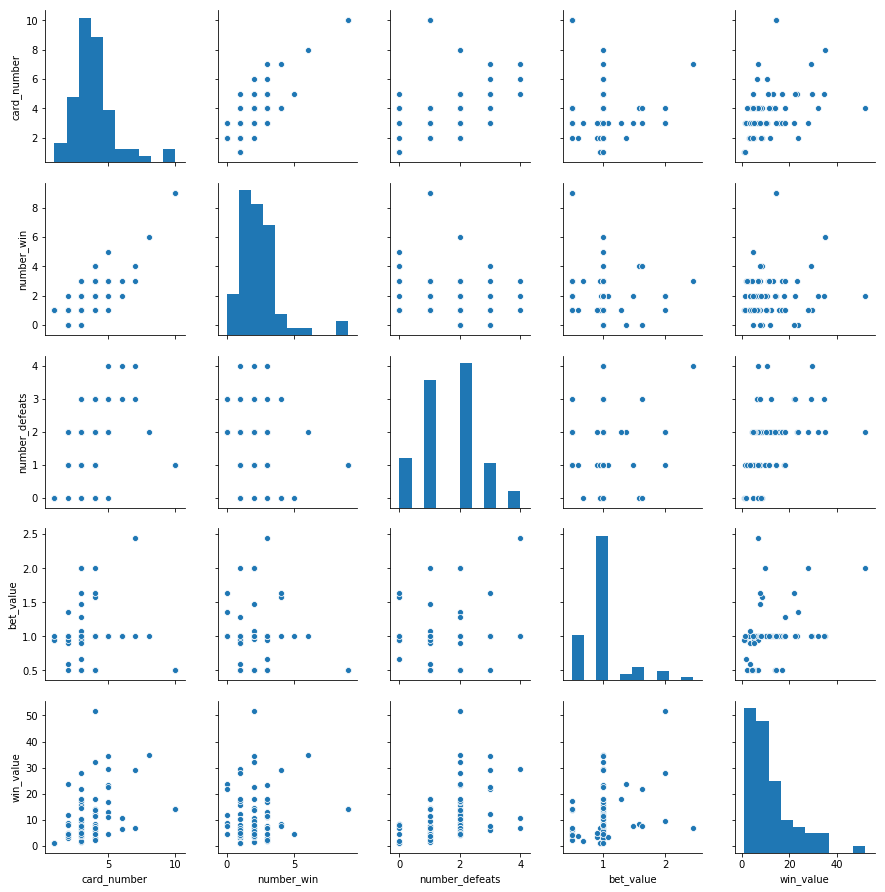

In [16]:
sns.pairplot(df_result)

/home/iva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


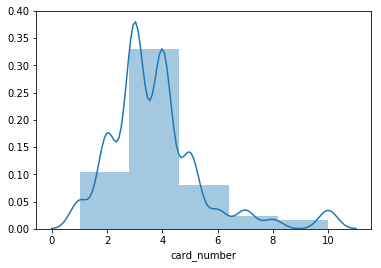

In [19]:
sns.distplot(df_result['card_number'], kde=True, bins=5)

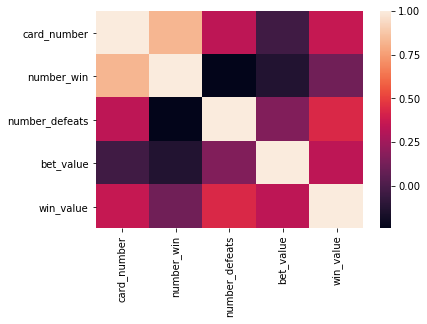

In [20]:
sns.heatmap(df_result.corr())

/home/iva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


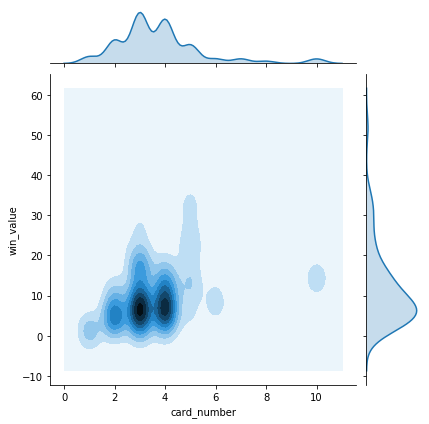

In [21]:
sns.jointplot(x='card_number', y='win_value', data=df_result, kind='kde')

/home/iva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


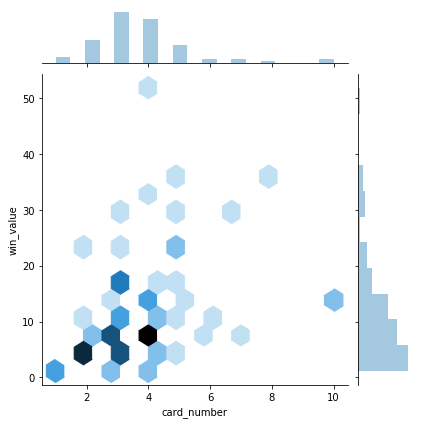

In [22]:
sns.jointplot(x='card_number', y='win_value', data=df_result, kind = "hex")

/home/iva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/iva/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


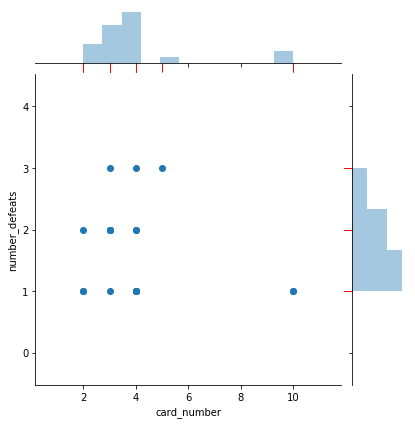

In [214]:
g = sns.jointplot(data=df_result, x='card_number', y='number_defeats')
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

In [34]:
df = pd.read_csv("result`data.csv",index_col=0)

In [35]:
df.head()

,number_win,number_defeats,bet_value,win_value,card_type,result,bet_type,date
card_number,,,,,,,,
4,2,2,1.00,14.05,unique,defeats,per goal,2024-08-01
4,3,1,1.00,7.81,unique,defeats,per goal,2024-08-01
3,1,2,1.00,15.77,unique,defeats,per goal,2024-08-01
5,3,2,1.00,16.88,unique,defeats,per goal,2024-08-01
4,4,0,1.57,8.61,unique,win,per goal,2024-08-01


In [28]:
df = pd.read_csv("result`data.csv")

In [72]:
df.head()

,number_win,number_defeats,bet_value,win_value,card_type,result,bet_type,date
card_number,,,,,,,,
4,2,2,1.00,14.05,unique,defeats,per goal,2024-08-01
4,3,1,1.00,7.81,unique,defeats,per goal,2024-08-01
3,1,2,1.00,15.77,unique,defeats,per goal,2024-08-01
5,3,2,1.00,16.88,unique,defeats,per goal,2024-08-01
4,4,0,1.57,8.61,unique,win,per goal,2024-08-01


In [43]:
df_result = pd.read_csv("result`data.csv")

In [71]:
df_result.iloc[:, [0]].head()

,card_number
0,4
1,4
2,3
3,5
4,4


In [53]:
from sklearn.datasets import make_blobs

In [54]:
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

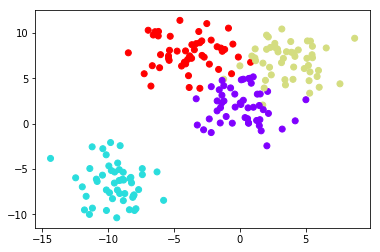

In [77]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

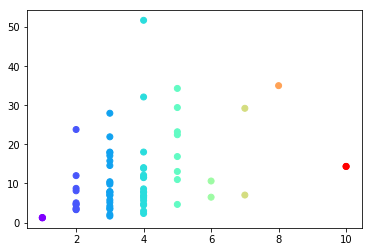

In [95]:
plt.scatter(df_result.iloc[:, [0]],df_result.iloc[:, [4]],c= df_result.iloc[:, [0]],cmap='rainbow')

In [96]:
from sklearn.cluster import KMeans

In [107]:
kmeans = KMeans(n_clusters=2)

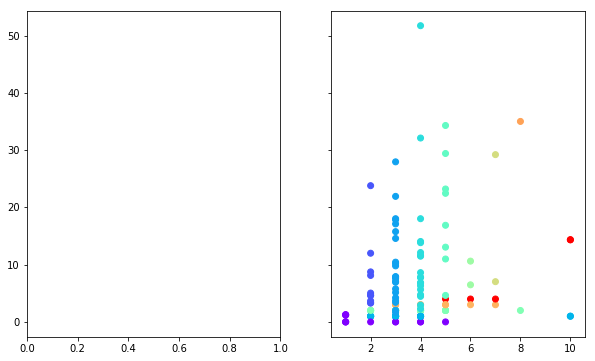

In [113]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax2.scatter(df_result.iloc[:, [0]],df_result.iloc[:, [2]],c= df_result.iloc[:,[2]],cmap='rainbow')
ax2.scatter(df_result.iloc[:, [0]],df_result.iloc[:, [4]],c= df_result.iloc[:, [0]],cmap='rainbow')

In [102]:
kmeans.labels

AttributeError: 'KMeans' object has no attribute 'labels'